<a href="https://colab.research.google.com/github/osh9149/2023_DataScience/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OpenCV(Open Source Computer Vision)는 영상 처리에 사용할 수 있는 오픈 소스 라이브러리 입니다.
- 컴퓨터가 사람의 눈처럼 인식할 수 있게 처리해주는 역할
- 카메라 어플에서도 OpenCV가 사용
- 자율주행자동차에서 자동차의 눈이 되주는 것이 카메라와 OpenCV

추가로 사용되는 예로는

* 공장에서 제품 검사할 때
* 의료 영상 처리 및 보정 그리고 판단
* CCTV영상
* 로보틱스


#01. 이미지 출력
```
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("audrey.jpg")

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

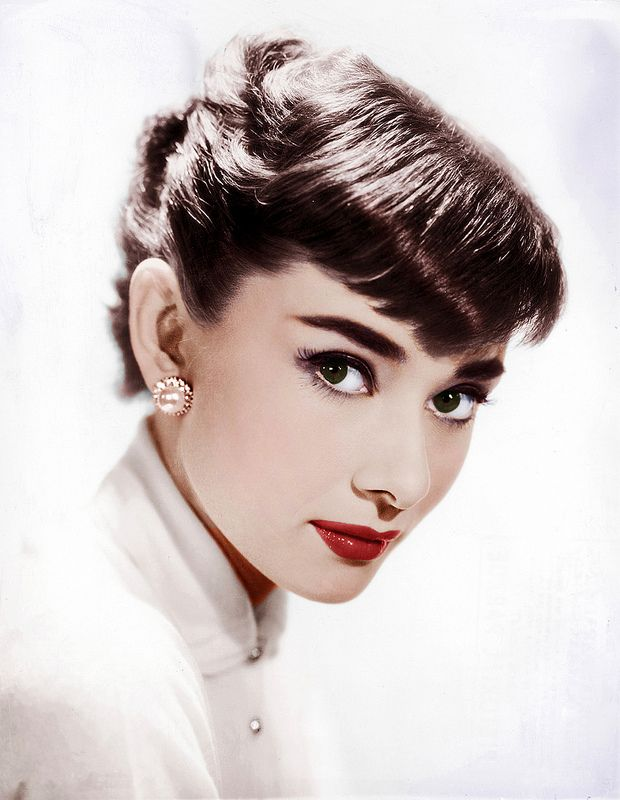

```
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("audrey.jpg", cv2.IMREAD_GRAYSCALE)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

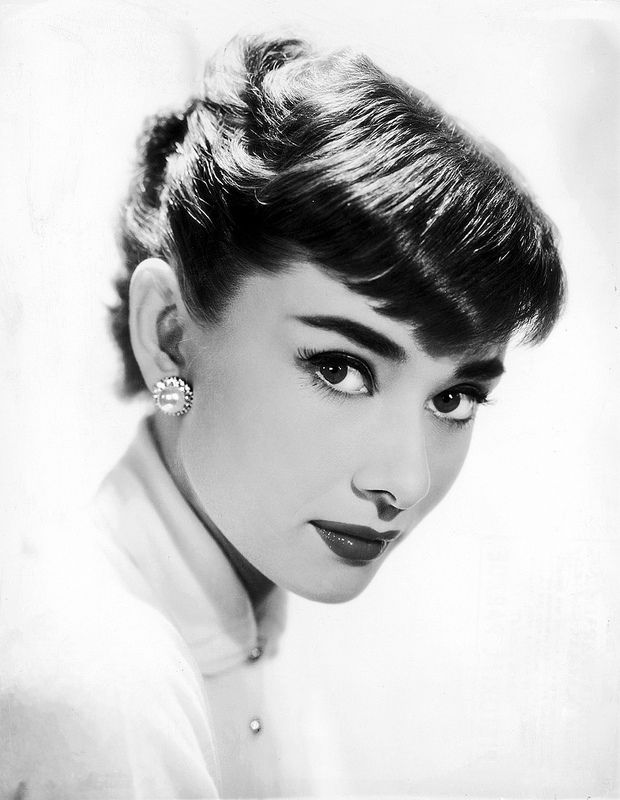

In [ ]:
# 회색으로 읽기



#이미지 저장하기
```
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("audrey.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
cv2.imwrite("audrey_bw.jpg", img) #파일로 저장, 포맷은 확장에 따름
cv2.waitKey()
cv2.destroyAllWindows()
```

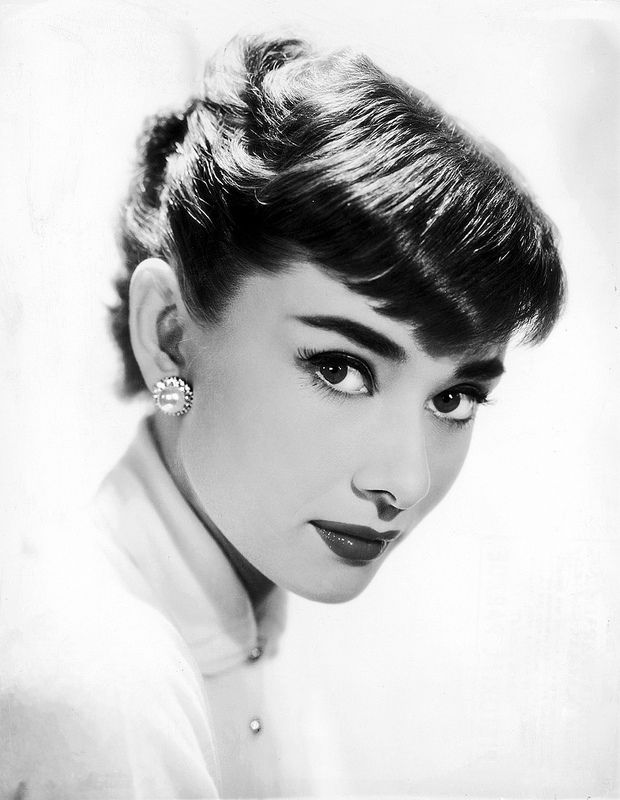

In [ ]:
# 이미지 저장하기




```
image = cv2.imread("audrey.jpg",cv2.IMREAD_UNCHANGED)
image2 = cv2.resize(image,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)

vertical = cv2.flip(image2,0)
all = cv2.flip(image2,-1)
mirror = cv2.flip(image2,1)

cv2_imshow(image2)
cv2_imshow(mirror)
cv2_imshow(vertical)
cv2_imshow(all)

cv2.waitKey(0)
cv2.destroyAllWindows()
```

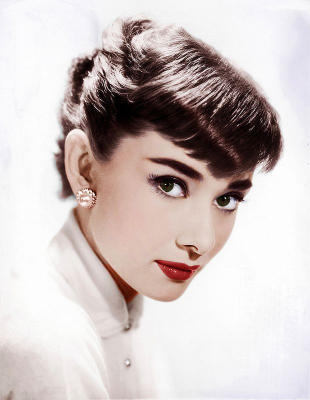

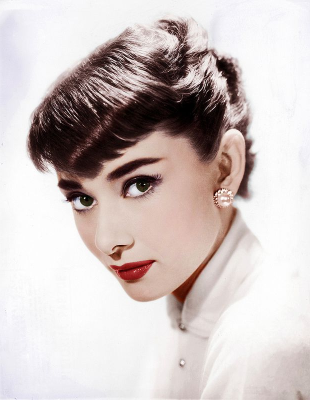

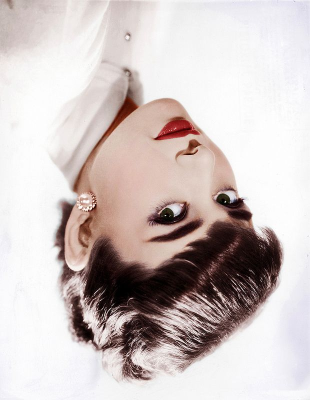

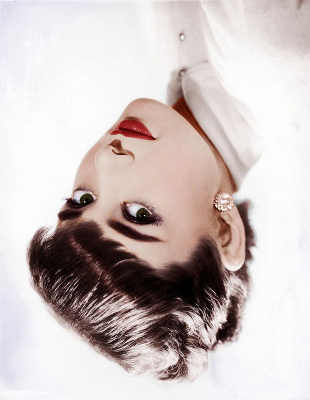

In [ ]:
#좌우 상하 반전






```
import cv2
import imutils
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

image = cv2.imread("audrey.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rotated_45 = imutils.rotate(image_rgb, 45)
rotated_30 = imutils.rotate(image_rgb, 30)

plt.figure(figsize=(10,8))
plt.subplot(1,3,1)
plt.imshow(image_rgb)
plt.title('original', fontsize=10)

plt.subplot(1,3,2)
plt.imshow(rotated_30)
plt.title('30 degree', fontsize=10)

plt.subplot(1,3,3)
plt.imshow(rotated_45)
plt.title('45 degree', fontsize=10)
plt.tight_layout()
```

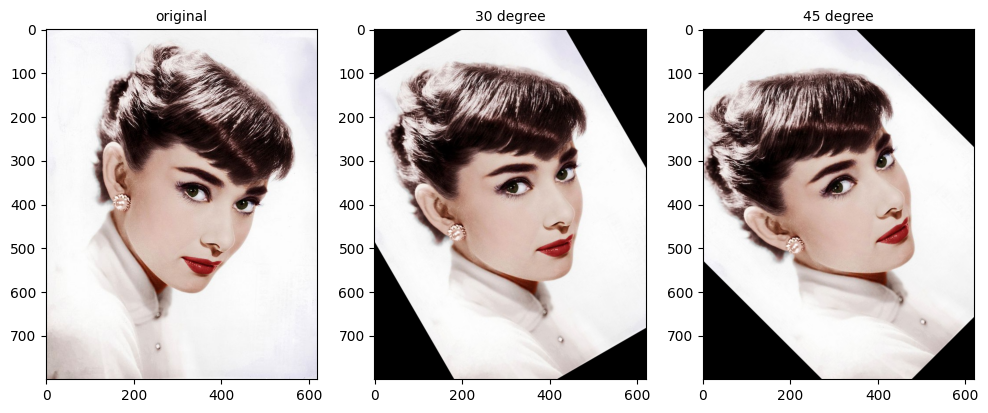

In [ ]:
#이미지 회전하기






```
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread("audrey.jpg")
# inverted_image = cv2.bitwise_not(img)
inverted_image = np.invert(img)
cv2.imwrite("inverted.jpg", inverted_image)
cv2_imshow(img)
cv2_imshow(inverted_image)
```

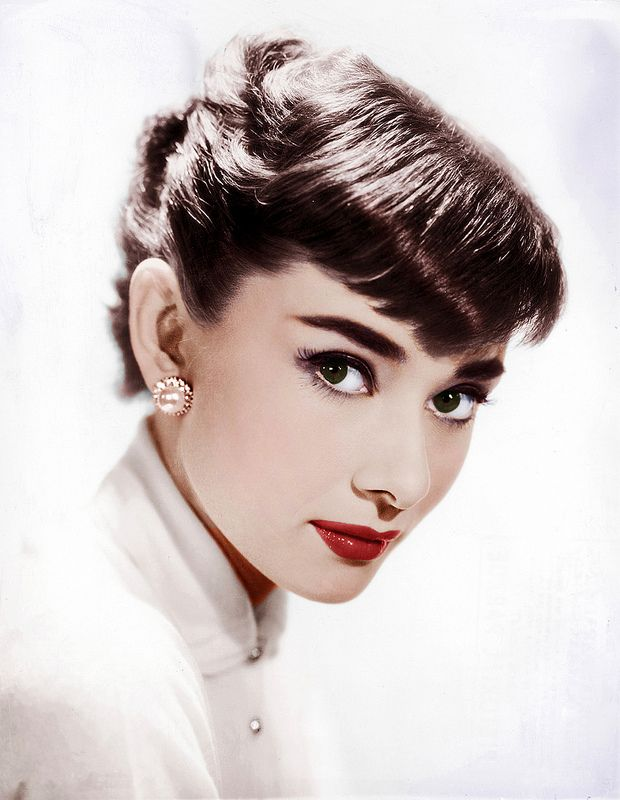

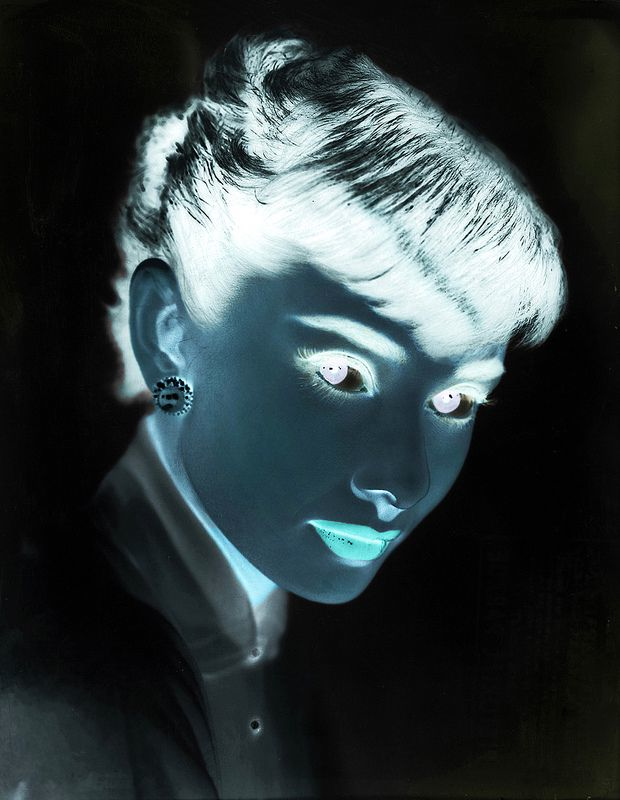

In [ ]:
#색상 반전



```
img = cv2.imread("audrey.jpg")
cv2_imshow(img)

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
```

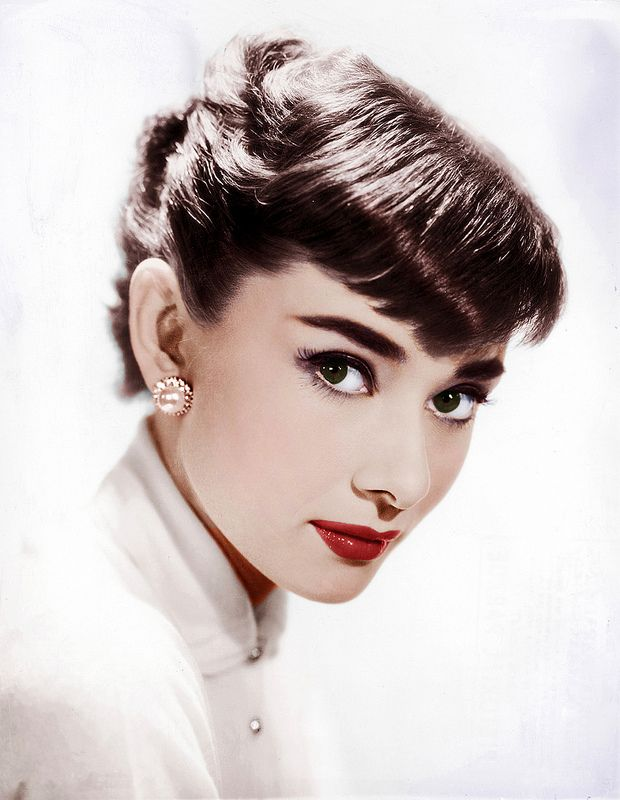

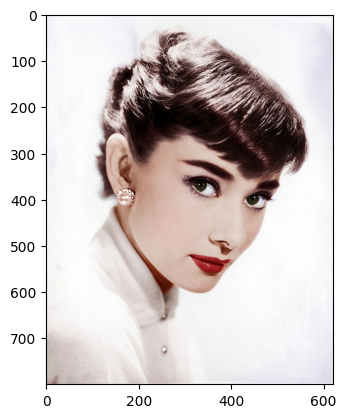

In [ ]:
#색상 공간 변환 함수인 cv2.cvtColor를 이용하여 BGR을 RGB 색상 공간으로 변경



```
#파랑색만
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

#빨강색만
red = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print(hsv_red)
```

In [ ]:
#이미지에서 특정색만 추출



[[[120 255 255]]]
[[[  0 255 255]]]


```
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_red = np.array([0,140,140])
upper_red = np.array([10,255,255])

mask = cv2.inRange(image_hsv, lower_red, upper_red)

res = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
```

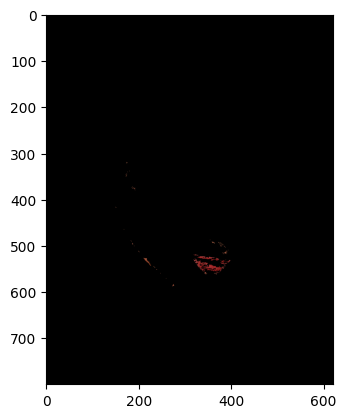

In [ ]:
#이미지에서 빨강색만 추출




#이미지 크기 변경
```
img = cv2.imread("audrey.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# 방법 1. dsize = (width, height)
resized_img = cv2.resize(img, dsize=(300,300), interpolation=cv2.INTER_LINEAR)
print(resized_img.shape)
cv2_imshow(resized_img)

cv2.waitKey()
cv2.destroyAllWindows()
```

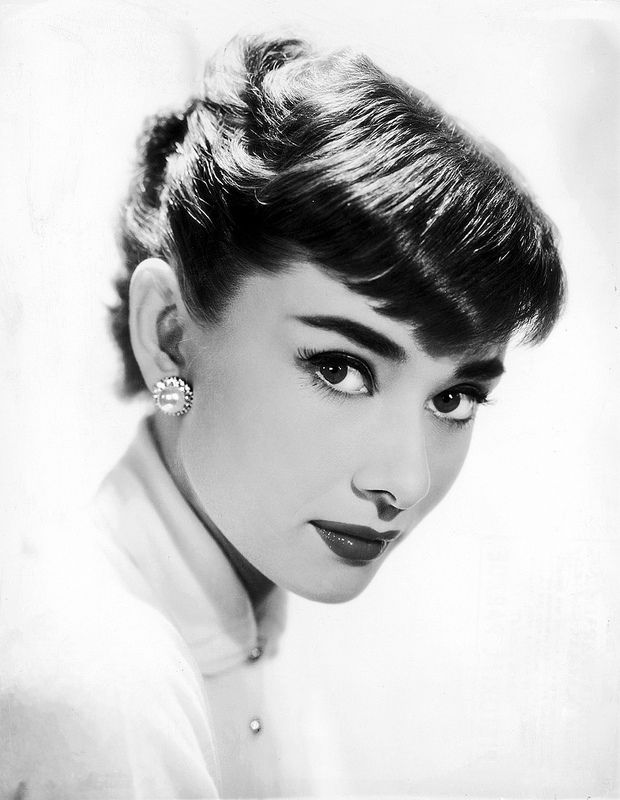

(300, 300)


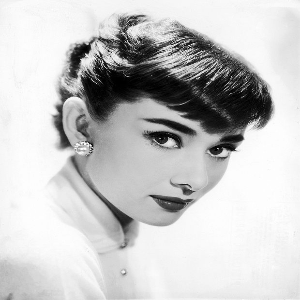

In [ ]:
#이미지 크기 변경




```
img = cv2.imread("audrey.jpg", cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

resized_img = cv2.resize(img, dsize=(0,0), fx=0.3, fy=0.3, interpolation=cv2.INTER_LINEAR)
print(resized_img.shape)

cv2_imshow(resized_img)

cv2.waitKey()
cv2.destroyAllWindows()
```

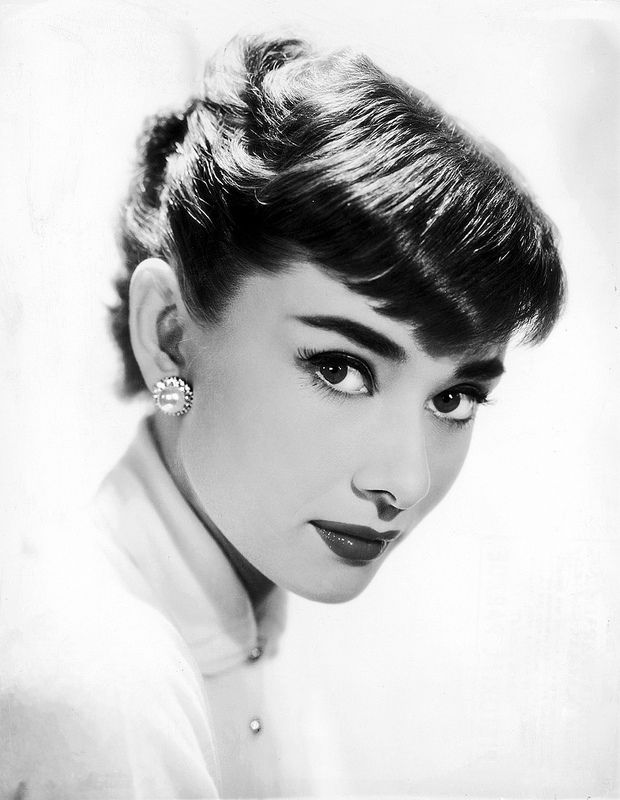

(240, 186)


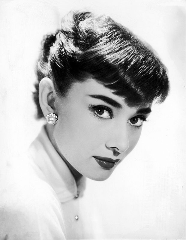

In [ ]:
# 방법 2. fx = width ratio, fy = height ratio




```
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("audrey.jpg")
plt.imshow(img)
```

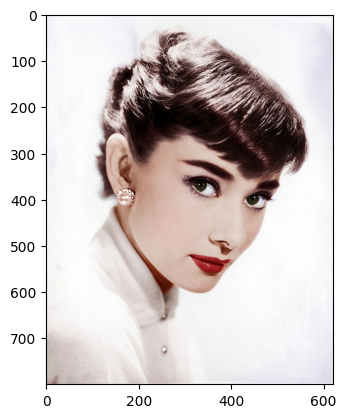

In [ ]:
# PIL, Matplotlib으로 출력


```
frm=plt.gca()
frm.axes.get_xaxis().set_visible(False)
frm.axes.get_yaxis().set_visible(False)

# PIL, Matplotlib으로 출력
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("audrey.jpg")
plt.imshow(img)
```

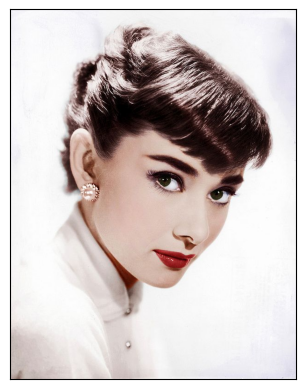

In [ ]:
#좌표 삭제


#윤곽선 찾기(Contours)
```
image = cv2.imread('./card.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Otsu's Threshold 로 이진화
ret, thres = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 가장 외곽의 윤곽선만 검출
contours1, hierarchy1 = cv2.findContours(thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# 모든 윤곽선 검출(계층 구조 X)
contours2, hierarchy2 = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# drawContour를 하면 이미지에 contour를 덮어쓰기 때문에 원본 이미지 2개를 복사
EXTERNAL = image.copy()
LIST = image.copy()

# drawContours를 하여 이미지에 윤곽선 그리기
cv2.drawContours(EXTERNAL, contours1, -1, (0,255,0),2)
cv2.drawContours(LIST, contours2, -1, (0,255,0),2)

# 이미지 출력
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.title('original')
plt.imshow(image)

plt.subplot(3,1,2)
plt.title('EXTERNAL')
plt.imshow(EXTERNAL)

plt.subplot(3,1,3)
plt.title('LIST')
plt.imshow(LIST)
```

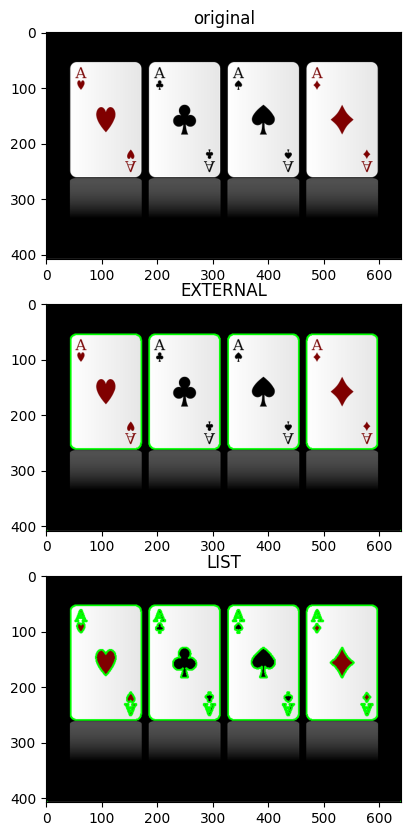